In [1]:
import pandas as pd


In [3]:
df = pd.read_csv("HRDataset_v14.csv")

In [4]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [7]:
from datetime import datetime

df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%Y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%Y', errors='coerce')

today = pd.Timestamp(datetime.today())
df['Age'] = (today - df['DOB']).dt.days // 365
df['Tenure'] = (df['DateofTermination'].fillna(today) - df['DateofHire']).dt.days // 365

In [10]:
df.drop(columns=[
    'Employee_Name', 'EmpID', 'Zip', 
    'ManagerName', 'LastPerformanceReview_Date'
], inplace = True)

In [13]:
df['ManagerID'] = df['ManagerID'].fillna(-1)

In [14]:
df.isnull().sum().sort_values(ascending=False)

DateofTermination         207
MarriedID                   0
RaceDesc                    0
Age                         0
Absences                    0
DaysLateLast30              0
SpecialProjectsCount        0
EmpSatisfaction             0
EngagementSurvey            0
PerformanceScore            0
RecruitmentSource           0
ManagerID                   0
Department                  0
EmploymentStatus            0
TermReason                  0
DateofHire                  0
HispanicLatino              0
MaritalStatusID             0
CitizenDesc                 0
MaritalDesc                 0
Sex                         0
DOB                         0
State                       0
Position                    0
PositionID                  0
Termd                       0
Salary                      0
FromDiversityJobFairID      0
PerfScoreID                 0
DeptID                      0
EmpStatusID                 0
GenderID                    0
Tenure                      0
dtype: int

In [15]:
df.groupby('Department')['Termd'].mean().sort_values(ascending=False)

Department
Production              0.397129
Software Engineering    0.363636
Admin Offices           0.222222
IT/IS                   0.200000
Sales                   0.161290
Executive Office        0.000000
Name: Termd, dtype: float64

In [16]:
(df.groupby('Department')['Termd'].mean() * 100).round(1).sort_values(ascending=False)

Department
Production              39.7
Software Engineering    36.4
Admin Offices           22.2
IT/IS                   20.0
Sales                   16.1
Executive Office         0.0
Name: Termd, dtype: float64

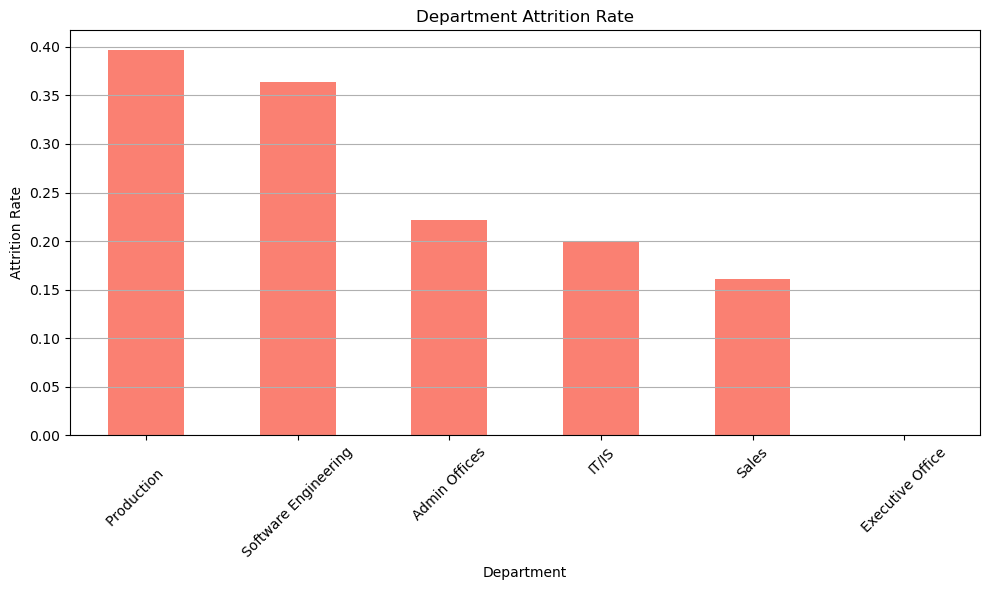

In [25]:
import matplotlib.pyplot as plt

dept_attrition = df.groupby('Department')['Termd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
dept_attrition.plot(kind='bar', color='salmon')

plt.title('Department Attrition Rate')
plt.ylabel('Attrition Rate')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("department_attrition.png", dpi=300)
plt.show()

In [24]:
plt.savefig("department_attrition.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [20]:
dept_attrition.to_excel("attrition_by_department.xlsx")

In [21]:
import os
os.getcwd()

'C:\\Users\\kuoou'

In [26]:
df.groupby('EmpSatisfaction')['Termd'].mean().sort_index()

EmpSatisfaction
1    0.000000
2    0.444444
3    0.305556
4    0.404255
5    0.295918
Name: Termd, dtype: float64

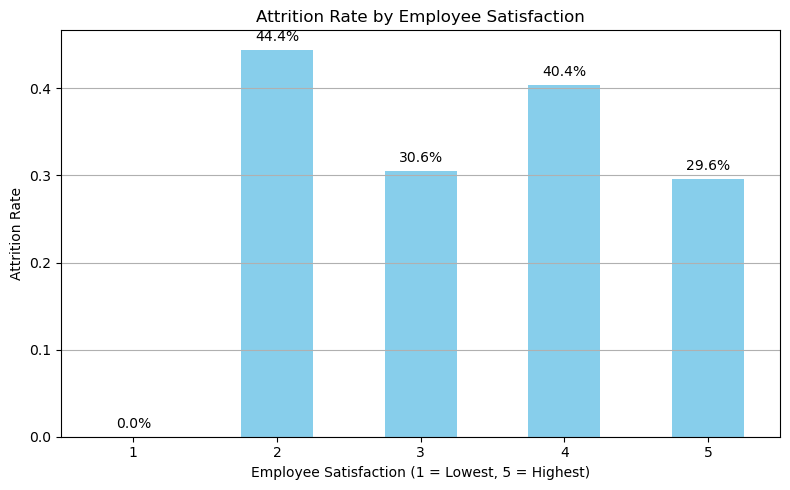

In [28]:
import matplotlib.pyplot as plt

satisfaction_attrition = df.groupby('EmpSatisfaction')['Termd'].mean().sort_index()

plt.figure(figsize=(8, 5))
satisfaction_attrition.plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Employee Satisfaction')
plt.xlabel('Employee Satisfaction (1 = Lowest, 5 = Highest)')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i, v in enumerate(satisfaction_attrition):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')

plt.tight_layout()
plt.savefig("Attrition Rate by Employee Satisfaction.png", dpi=300)
plt.show()

In [29]:
satisfaction_attrition.to_excel("attrition_by_satisfaction.xlsx")

In [30]:
df['EmpSatisfaction'].value_counts()

EmpSatisfaction
3    108
5     98
4     94
2      9
1      2
Name: count, dtype: int64

In [34]:
avg_salary = df.groupby('Termd')['Salary'].mean().rename(index={0: 'Still Employed', 1: 'Left Company'})
print(avg_salary)

Termd
Still Employed    70694.033816
Left Company      65690.076923
Name: Salary, dtype: float64


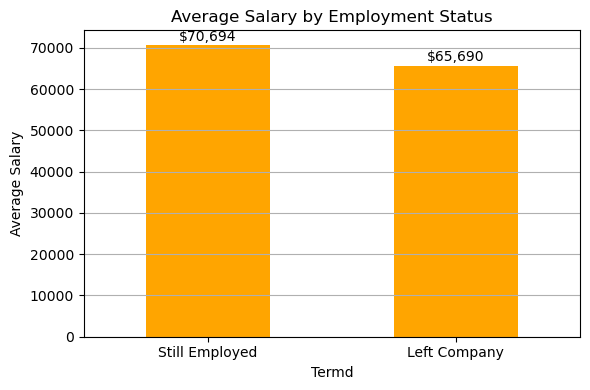

In [35]:
import matplotlib.pyplot as plt

avg_salary = df.groupby('Termd')['Salary'].mean().rename(index={0: 'Still Employed', 1: 'Left Company'})

plt.figure(figsize=(6, 4))
avg_salary.plot(kind='bar', color='orange')
plt.title('Average Salary by Employment Status')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i, v in enumerate(avg_salary):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center')

plt.tight_layout()
plt.savefig("Average Salary by Employment Status.png", dpi=300)
plt.show()

In [36]:
avg_salary.to_excel("average_salary_by_employment_status.xlsx")

In [38]:
df.groupby('RecruitmentSource')['Termd'].mean().sort_values(ascending=False)

RecruitmentSource
On-line Web application    1.000000
Google Search              0.612245
Diversity Job Fair         0.551724
Other                      0.500000
CareerBuilder              0.478261
Indeed                     0.241379
LinkedIn                   0.236842
Employee Referral          0.161290
Website                    0.076923
Name: Termd, dtype: float64

In [39]:
recruitment_attrition = (df.groupby('RecruitmentSource')['Termd'].mean() * 100).round(1).sort_values(ascending=False)
print(recruitment_attrition)

RecruitmentSource
On-line Web application    100.0
Google Search               61.2
Diversity Job Fair          55.2
Other                       50.0
CareerBuilder               47.8
Indeed                      24.1
LinkedIn                    23.7
Employee Referral           16.1
Website                      7.7
Name: Termd, dtype: float64


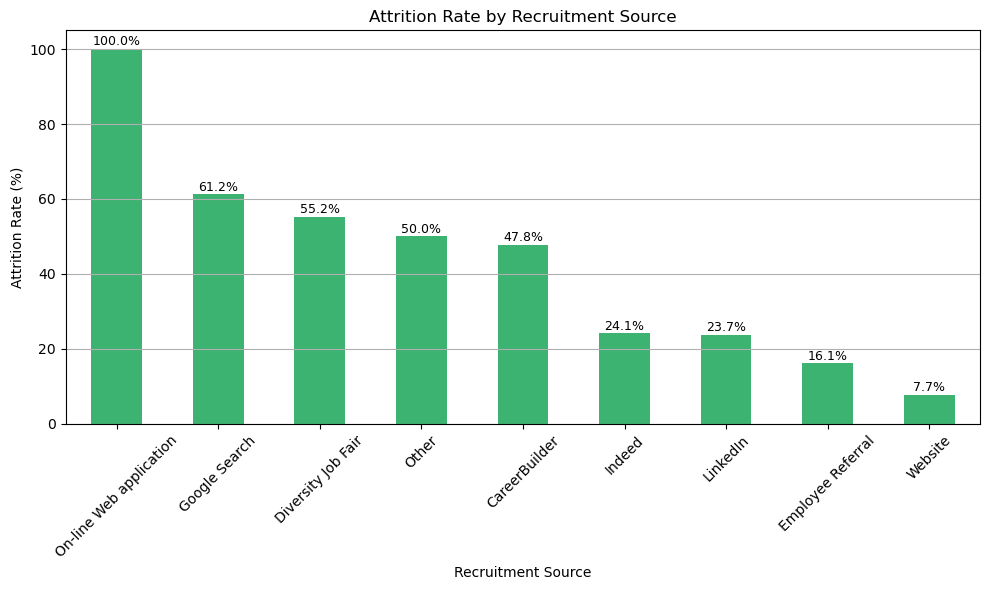

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
recruitment_attrition.plot(kind='bar', color='mediumseagreen')
plt.title('Attrition Rate by Recruitment Source')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Recruitment Source')
plt.xticks(rotation=45)
plt.grid(axis='y')

for i, v in enumerate(recruitment_attrition):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("Attrition Rate by Recruitment Source", dpi=300)
plt.show()

In [41]:
recruitment_attrition.to_excel("attrition_by_recruitment_source.xlsx")

In [42]:
features = [
    'EmpSatisfaction', 'EngagementSurvey', 'Salary', 'SpecialProjectsCount',
    'DaysLateLast30', 'Absences', 'Age', 'Tenure'
]

X = df[features]
y = df['Termd']

In [43]:
X = X.fillna(0)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\kuoou\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9680851063829787
Confusion Matrix:
 [[66  0]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.89      0.94        28

    accuracy                           0.97        94
   macro avg       0.98      0.95      0.96        94
weighted avg       0.97      0.97      0.97        94



In [47]:
X_test['PredictedTermd'] = y_pred
X_test['ActualTermd'] = y_test.values
X_test.to_excel("attrition_predictions.xlsx")